# Teorema do Limite Central
* **Médias Amostrais**: médias geradas de amostras, geralmente com o propósito de gerar probabilidades
* A média de médias amostrais deve ser mais próxima da média da população com um desvio padrão pequeno
* Quanto maior a quantidade de amostras e médias amostrais utilizadas, mais próximo estará da média geral da População e menor o desvio padrão

<center><h2>Exemplo: Cubo</h2>
Consideremos um dado de seis lados. A probabilidade de dar qualquer valor entre 1 e 6 é de ${\frac {1}{6}}$ ou seja, todos os valores são igualmente possíveis de ocorrer. O conjunto de números possíveis são $[1,2,3,4,5,6]$. Ao realizar a média desse conjunto $(1+2+3+4+5+6)/6$, obtivemos <strong>3.5</strong>.
<img src="imagens/dado.jpg" alt="Dado" width=300px />
</center>

### Importar numpy e matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Média

In [2]:
np.mean(list(range(1,7)))

3.5

### Jogar dado aleatoriamente

In [3]:
np.random.randint(1,7)

6

### Jogar dado aleatoriamente 6 vezes

In [4]:
np.random.randint(1,7,6)

array([3, 2, 6, 5, 2, 4])

### Gerar os mesmos números aleatórios
Fornecendo um valor como semente _(seed)_ $\Rightarrow$ "123"

In [5]:
np.random.seed(123)
np.random.randint(1,7,6)

array([6, 3, 5, 3, 2, 4])

### Jogar dado aleatoriamente 40 vezes

In [6]:
np.random.seed(123)
np.random.randint(1,7,40)

array([6, 3, 5, 3, 2, 4, 3, 4, 2, 2, 1, 2, 2, 1, 1, 2, 4, 6, 5, 1, 1, 5,
       2, 4, 3, 5, 3, 5, 1, 6, 1, 2, 4, 5, 5, 5, 2, 6, 4, 3])

### Gerar média amostral

In [7]:
np.random.seed(123)
sample = np.random.randint(1,7,40)
sample

array([6, 3, 5, 3, 2, 4, 3, 4, 2, 2, 1, 2, 2, 1, 1, 2, 4, 6, 5, 1, 1, 5,
       2, 4, 3, 5, 3, 5, 1, 6, 1, 2, 4, 5, 5, 5, 2, 6, 4, 3])

In [8]:
np.mean(sample)

3.275

### Utilizar mil médias amostrais
Comprovar o Teorema do Limite Central (TLC)

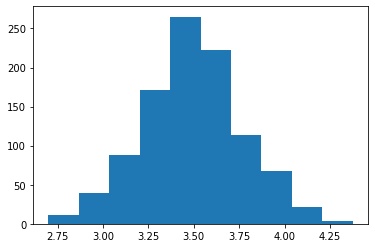

In [9]:
np.random.seed(123)
sample_means = [np.mean(np.random.randint(1,7,40)) for _ in range(1000)]
plt.hist(sample_means)
plt.show()

### Média

In [10]:
np.mean(sample_means)

3.49475

### Mediana

In [11]:
np.median(sample_means)

3.5

### Moda

In [12]:
import statistics as stats

In [13]:
stats.mode(sample_means)

3.45

# Teorema do Limite Central em um DataFrame
Aplicando o mesmo conceito com um DataFrame de um arquivo CSV

### Importar pandas

In [14]:
import pandas as pd

### Ler DataFrame do arquivo 'weight-height.csv'

In [15]:
df = pd.read_csv('CSVs/weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


### Verificar tamanho da amostra

In [16]:
len(df['Weight'])

10000

### Gerar amostra aleatória 5 elementos

In [17]:
np.random.seed(123)
df['Weight'].sample(n=5)

2656    208.839162
445     216.634000
9505    103.386946
332     185.042324
4168    192.756097
Name: Weight, dtype: float64

### Gerar 200 médias amostrais de 50 amostras cada

In [18]:
np.random.seed(123)
sample_means = [df['Weight'].sample(n=50).mean() for _ in range(200)]
sample_means

[162.77364907563276,
 169.1789660789801,
 173.54232012047927,
 159.02814469668184,
 163.5385963824624,
 155.08083783726497,
 152.37682945131976,
 158.58754812843733,
 162.85151871487437,
 160.22620929858306,
 155.91778483747655,
 164.55078574428993,
 163.7216758194734,
 162.9678230214545,
 159.47883991944144,
 164.1722456620811,
 154.2460609361593,
 155.0067123771831,
 157.64153409562354,
 162.40666622153057,
 153.67387722752778,
 159.99387664769742,
 161.54661906371442,
 157.98792904509844,
 166.50849248505153,
 161.48351454577562,
 161.5817558613573,
 156.9380341348253,
 160.88674360901865,
 158.77044671829583,
 163.77610710297856,
 166.3419735238348,
 161.4699851213748,
 154.37591378011538,
 161.5351377406341,
 165.49680449576437,
 163.30829928444788,
 165.99900708566344,
 159.17175737543184,
 164.07840580207613,
 157.05044183651157,
 160.38800286363875,
 165.8080420140128,
 160.87141841898753,
 159.0040573307024,
 162.05476785386566,
 161.4310659734868,
 159.4254748185431,
 155.924

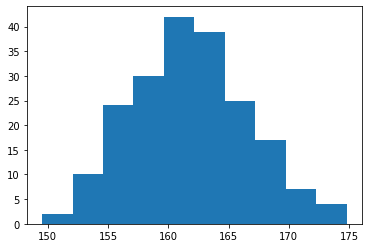

In [19]:
plt.hist(sample_means)
plt.show()

# Exercício
Numa pesquisa constatou-se que 95 de um total de 174 pessoas votarão em um específico candidato ao Senado. Construa uma estimativa com um Intervalo de Confiança de 90% de proporção das pessoas de toda a População que votarão nesse candidato. 

$$\hat{p}=\frac x n = \frac {95} {174} = 0.546$$ <br/>

$$\hat{q}= 1-0.546 = 0.454$$ <br/>

$$Z_{\alpha/2} = Z_{0.10/2} = Z_{0.05}=1.645$$ <br/>

$$E = Z_{\alpha/2} \sqrt { \frac {\hat{p}\hat{q}}{n}}=1.645 \sqrt { \frac {0.546 \cdot 0.454}{174}}=0.062$$ <br/>

$$[\hat{p}-E,\hat{p}+E] = [0.546-0.062, 0.546+0.062] = [0.484,0.608] $$ 

### Interpretando o Intervalo de Confiança
"Estimamos com X% de confiança, que a real população (parâmetro em contexto) se encontra entre (menor) e (maior)"

**Estimamos com 90% de confiança que a proporção das pessoas de toda a população que votarão no candidato ao Senado se encontra entre 48,4% e 60,8%.**

In [190]:
import scipy.stats as st

def get_p(x:float, n:float)->float:
    return x / n

def get_q(p:float)->float:
    return 1 - p

def get_z(p:float, interval:tuple)->float:
    return (p - interval[0]) / interval[1]

def conf_interval(x:float, n:float, ci:int=90)->list:
     
    if ci == 90:
        z = 1.645
    elif ci == 95:
        z = 1.960
    elif ci == 99:
        z = 2.576
    else:
        return print('The CI needs to be 90, 95 or 99.')

    p = get_p(x, n)
    q = get_q(p)
    e = z * ((p * q / n)**0.5)
    
    return {'Interval':[round(p-e, 3), round(e+p, 3)],'E_margin':round(e, 3)}

def get_interval(h:float, n:float):
    return h, ((h * get_q(h)) / n) ** 0.5

def hip_test(z:float):
    return round(0.5 - round(round(st.norm.cdf(round(z,2)),4)-0.5, 4), 4)*2

In [191]:
conf_interval(95,174, 90)

{'Interval': [0.484, 0.608], 'E_margin': 0.062}

In [192]:
conf_interval(95,174, 95)

{'Interval': [0.472, 0.62], 'E_margin': 0.074}

In [193]:
conf_interval(95,174, 99)

{'Interval': [0.449, 0.643], 'E_margin': 0.097}

# Teste de Hipóteses
 Uma forma de testar uma afirmação

## Exemplo (IPhone)
Uma empresa telefônica afirma que 43% dos usuários de smartphone nos EUA usam IPhone. Você duvida dessa afirmação. Então você faz uma pesquisa de 83 usuários americanos de smartphone. 44 deles usam IPhone. O que você pode concluir, se $\alpha=0.05$?

$H_0$: $\hat{p}$ = 0.43 <br>
$H_a$: $\hat{p}$ ≠ 0.43 _(teste de duas caldas, rejeitamos se for menor ou maior)_

$$\hat{p} \sim N(\hat{p}, \sqrt {\frac {\hat{p}\hat{q}}{n}})=\hat{p} \sim N(0.43,\sqrt {\frac {0.43 \cdot 0.57}{83}})=\hat{p} \sim N(0.43,0.0543)$$

<img src="imagens/1.png" width=350px /><br><br>

<center>Calculando o $\hat{p}$ da proporção</center>
$$\hat{p} = \frac x n = \frac {44}{83} = 0.53$$
<img src="imagens/2.png" width=350px /><br><br>


<center>Calculando o valor-Z</center>
$$Z = \frac {\hat{p} - \hat{p}_{H_0}}{EP} = \frac {0.53 - 0.43}{0.0543}=1.84$$
<img src="imagens/3.png" width=350px /><br><br>

<center>Ir na tabela Z e verificar a probabilidade correspondente desse valor-Z: $0.9671$, se tirarmos a outra metade, $0.9671-0.5 = 0.4671$ </center>
<img src="imagens/4.png" width=350px /><br><br>

<center>Mas a área que desejamos é a da calda. Logo, calculamos $0.5 - 0.4671 = 0.0329$</center>
<img src="imagens/6.png" width=350px /><br><br>

Calculamos o valor-p = $0.0329 + 0.0329 = 0.0658$ (valor-p é a probabilidade de $H_0$ ser verdadeira baseando-se na nossa amostra).Em outras palavras, baseando-se na nossa pesquisa, existe 6.58% de chance da proporção de usuários realmente ser 43%.

**Decisão**: falhamos em rejeitar a hipótese nula<br>
**Motivo**: valor-p > $\alpha$ = 0.0658 > 0.005<br>
**Conclusão**: Não existe suficiente evidência para concluir que a proporção de usuários de IPhone é diferente de 43%.

In [194]:
h = 0.43
n = 83
x = 44

In [195]:
interval = get_interval(h, n)
interval

(0.43, 0.05434162353291233)

In [196]:
p = get_p(x, n)
p

0.5301204819277109

In [197]:
z = get_z(get_p(x, n), get_interval(h, n))
z

1.8424271381415815

In [198]:
hypothesis = hip_test(get_z(get_p(x, n), get_interval(h, n)))
hypothesis

0.0658

# Façamos um intervalo de confiança de 95%
$$\hat{p} = 0.53$$ <br>
$$\hat{q} = 0.47$$ <br>
$$Z_{\alpha/2} = Z_{0.05/2} = Z_{0.025}=1.96$$ <br>

$$E = Z_{\alpha/2} \sqrt { \frac {\hat{p}\hat{q}}{n}}=1.96 \sqrt { \frac {0.53 \cdot 0.47}{83}}=0.107$$ <br/>

$$[\hat{p}-E,\hat{p}+E] = [0.53-0.107, 0.53+0.107] = [0.423,0.637] $$ 

In [199]:
conf_interval(x, n, 95)

{'Interval': [0.423, 0.637], 'E_margin': 0.107}

**Podemos dizer com 95% de confiança que a proporção de americanos que usam IPhone se encontra entre 42,3% e 63,7%.**

In [214]:
from model.Probability import Probability

In [215]:
prob = Probability()

In [216]:
prob.conf_interval(x, n, 95)

{'Interval': [0.423, 0.637], 'E_margin': 0.107}

In [217]:
prob.hip_test(get_z(get_p(x, n), get_interval(h, n)))

0.0658